<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime # Datetime module

This notebook provides an overview of basic concepts in data cleaning, data wrangling, data preparation, data profiling, data pipeline and/or data transformation. Note that the terms data cleaning, wrangling, preparation, pipeline and in cases transformation is used intercheangeably depending on the software or commercial framework being used. Even though in many cases there is a lot of overlap in many cases they also include different tasks of related to data science. However, the terms are currently not defined in the few available data science concensus standards. 

From this point this task will be referred to data cleaning. Data cleaning is the most critical step in all data science projects and is one where the data scientist will spend the most amount of time. Data cleaning is performed in order to prepare the data as input to the exploratory data analysis and artificial intelligence algorithms. Not addressing issues in the data may negatively affect insights obtained from the data analysis, outputs and performance of the algorithms and models used. 

Data Cleaning steps include the following tasks:
1. Remove duplicates (e.g., full duplicates, duplicated unique feature)
2. Remove irrelevant data (e.g., outliers) when appropriate
3. Remove unneeded features.
4. Missing/Null values:
    - Remove missing/null values. 
    - Remove the record? 
    - Imputation of missing data (replace the value for another):
        - For time series data, can I take the average of adjacent points? If multiple points, is it appropriate to use forecasting to estimate those values?
        - Replace the missing/null value with the mean of the group's values? 
        - Replace missing/null value with a conservative, non-conservative, realistic or best estimate values and assumptions when possible. For example, the minimum or maximum of the group values may be a conservative assumption.
5. Identify and fix errors where possible. Can the team correct the errors? Drop the record with the error? Examples of errors may include miss-classifications, negative values where a positive values is expected, wrong dates, misspelling, orders of magnitude errors (e.g., person with several hundred years of age), etc. 
6. Verify data types and convert as needed
7. Data balance:  
8. Data bias: Evaluating biases in the data should be part of most data science tasks from data cleaning to model implementation to model deployment.

Data issues can also be evaluated using sensitivity testing. This referes to the process of evaluating the effect of a data issue in a calculated statistics, visualizations or model before and after a change or correction.

A dataset can also be enhanced or augmented by creating new derived feature, processing of unstructured data, performing natural language processing, or combining with another dataset. Depending on the approach a project is using, an initial step of data processing may be done during the data cleaning stage. In other cases it may be done during the exploratory data analysis (EDA) or model deployement.
1. Convert multi-label or multi-class features to one-hot-encoding if needed
2. Combine columns if needed
3. Derived or calculated features
4. Text Normalization (e.g., clear formatting, standardize capitalization, remove special characters, text lemmatization/stemming, etc.)
5. Language translation if needed

The extent of the data cleaning, data wrangling and data transformation will also take into consideration input from other team members and stakeholders including but not limited to subject matter expert (SME), data scientists, statisticians, project managers, advisors, management, customers and users of the data. Furter, issues with the data can be found during other steps that will required returning to the data cleaning step to address.

Documentation References:
- Missing Values in Pandas: https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

# Table of Contents
[Data Loading](#Data-Loading)

[Dataframe Information](#Dataframe-Information)

[Data Cleaning](#Data-Cleaning)

[Drop Columns](#Drop-Columns)

[Convert Data Types](#Convert-Data-Types)

[Duplicated Values: Statistics and Cleaning](#Duplicated-Values:-Statistics-and-Cleaning)

[Null Values: Statistics and Cleaning](#Null-Values:-Statistics-and-Cleaning)

[Numerical Features: Statistics and Cleaning](#Numerical-Features:-Statistics-and-Cleaning)

[Categorical Features (i.e., Non-numerical)](#Categorical-Features-(i.e.,-Non-numerical))

[Derived Features](#Derived-Features)

[Export Final DataFrame](#Export-Final-DataFrame)

# Data Loading
[Return to Table of Contents](#Table-of-Contents)

The following dataset is from https://www.kaggle.com/datasets/aephidayatuloh/nyc-flights-2013?select=nyc_flights.csv. The data used in this example has the following features/columns.
- year, month, day Date of departure.
- dep_time, arr_time Actual departure and arrival times (format HHMM or HMM), local tz.
- sched_dep_time, sched_arr_time Scheduled departure and arrival times (format HHMM or HMM),
- local tz.
- dep_delay, arr_delay Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- carrier Two letter carrier abbreviation. 
- flight Flight number.
- tailnum identification number of an aircraft painted on its tail
- origin, dest Origin and destination.
- air_time Amount of time spent in the air, in minutes.
- distance Distance between airports, in miles.
- hour, minute Time of scheduled departure broken into hour and minutes.
- time_hour Scheduled date and hour of the flight as a POSIXct date.
To reduce the file size to less than 25MB, the data removed the carrier B6 and WN. The full CSV file can be found under Lecture06/input_data/df_flights.zip.

In [2]:
# Note that below we are loading the dataset in a different director.
df_flights = pd.read_csv('../Lecture06/input_data/nyc_flights_small.csv')
# Use the .head() function to prevew a sample record from the dataframe.
df_flights.head(5)

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     554.0             600       -6.0     812.0   
4  2013      1    1     554.0             558       -4.0     740.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   
4             728       12.0      UA    1696  N39463    EWR  ORD     150.0   

   distance  hour  minute             time_hour  
0      1400     5      15  2013-01-01T10:00:00Z  
1      1416     5      29  2013-01-01T10:00:00Z  
2      1089     5      40  2013-01-01T10:00:00Z  
3       762     6       0  2013-01-01T11:00:00Z  
4       719     5      58  2013-01-01T10:00:00Z

In [3]:
# Another method to load dataset is to use an url (e.g., file in Github)
df_flights = pd.read_csv('https://raw.githubusercontent.com/fgonzaleumbc/DATA601/main/Lecture06/input_data/nyc_flights_small.csv')
# Use the .head() function to prevew a sample record from the dataframe.
df_flights.head(5)

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     554.0             600       -6.0     812.0   
4  2013      1    1     554.0             558       -4.0     740.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   
4             728       12.0      UA    1696  N39463    EWR  ORD     150.0   

   distance  hour  minute             time_hour  
0      1400     5      15  2013-01-01T10:00:00Z  
1      1416     5      29  2013-01-01T10:00:00Z  
2      1089     5      40  2013-01-01T10:00:00Z  
3       762     6       0  2013-01-01T11:00:00Z  
4       719     5      58  2013-01-01T10:00:00Z

# Dataframe Information
[Return to Table of Contents](#Table-of-Contents)

As part of the data cleaning one of the first steps is to explroe the statistics. This allows to identify columns and features that may need to be cleaned.

In [4]:
print(f'The dataframe (DF) has {df_flights.shape[0]} rows and {df_flights.shape[1]} features or columns.')

The dataframe (DF) has 269866 rows and 19 features or columns.


In [5]:
print(f'The dataframe (DF) has {df_flights.shape[0]:,} rows and {df_flights.shape[1]} features or columns.')

The dataframe (DF) has 269,866 rows and 19 features or columns.


In [6]:
# Column values.
df_flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [7]:
# Columns of the dataframe as a dataframe. 
# Used for column selection in loops used in the data cleaning, visualization and model functions below.
dfcolumns = list(df_flights.columns.values)
dfcolumns_index = pd.DataFrame(dfcolumns, columns=['column'])
dfcolumns_index

column
0             year
1            month
2              day
3         dep_time
4   sched_dep_time
5        dep_delay
6         arr_time
7   sched_arr_time
8        arr_delay
9          carrier
10          flight
11         tailnum
12          origin
13            dest
14        air_time
15        distance
16            hour
17          minute
18       time_hour

In [8]:
#.info() function provides DF information including column name, number of non-nulls, and DType.
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269866 entries, 0 to 269865
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            269866 non-null  int64  
 1   month           269866 non-null  int64  
 2   day             269866 non-null  int64  
 3   dep_time        262269 non-null  float64
 4   sched_dep_time  269866 non-null  int64  
 5   dep_delay       262269 non-null  float64
 6   arr_time        261851 non-null  float64
 7   sched_arr_time  269866 non-null  int64  
 8   arr_delay       261253 non-null  float64
 9   carrier         269866 non-null  object 
 10  flight          269866 non-null  int64  
 11  tailnum         267384 non-null  object 
 12  origin          269866 non-null  object 
 13  dest            269866 non-null  object 
 14  air_time        261253 non-null  float64
 15  distance        269866 non-null  int64  
 16  hour            269866 non-null  int64  
 17  minute    

In [9]:
# Observations:
# Year, month, day, hour, minute and Time_hour could be changed to datetime if needed.
# Should arrival or departure times be an integer or military time?

# Data Cleaning
[Return to Table of Contents](#Table-of-Contents)

The purpose of the data cleaning is to prepare the data for input to visualizations, analysis, machine learning, and other activities. There are easy to identify errors that can be easy to correct. There are other types of errors that may be harder to identify and address during the data cleaning stage and may require input from a subject matter expert (SME) that is familiar with the dataset that can provide advise on how to identify other types of errors and how to handle during the data cleaning.

In many of the examples here we will be droping features and rows. Depending on your use cases you will need to evaluate if it is appropriate to drop the data. I am a strong believer that if an error is found, the source data should be fixed in the database rather than addressing at the cleaning stage. If the source is not fixed, there is always a possibility that either us as data scientist may use the data in the future or some other analyst using the source data may not find the error and their analysis outputs and results may be skewed or worst be wrong.

The process of data cleaning is an interative process. Recall the image below. At any point in the data science work flows we can find errors or issues and may need to come back to the data cleaning step..

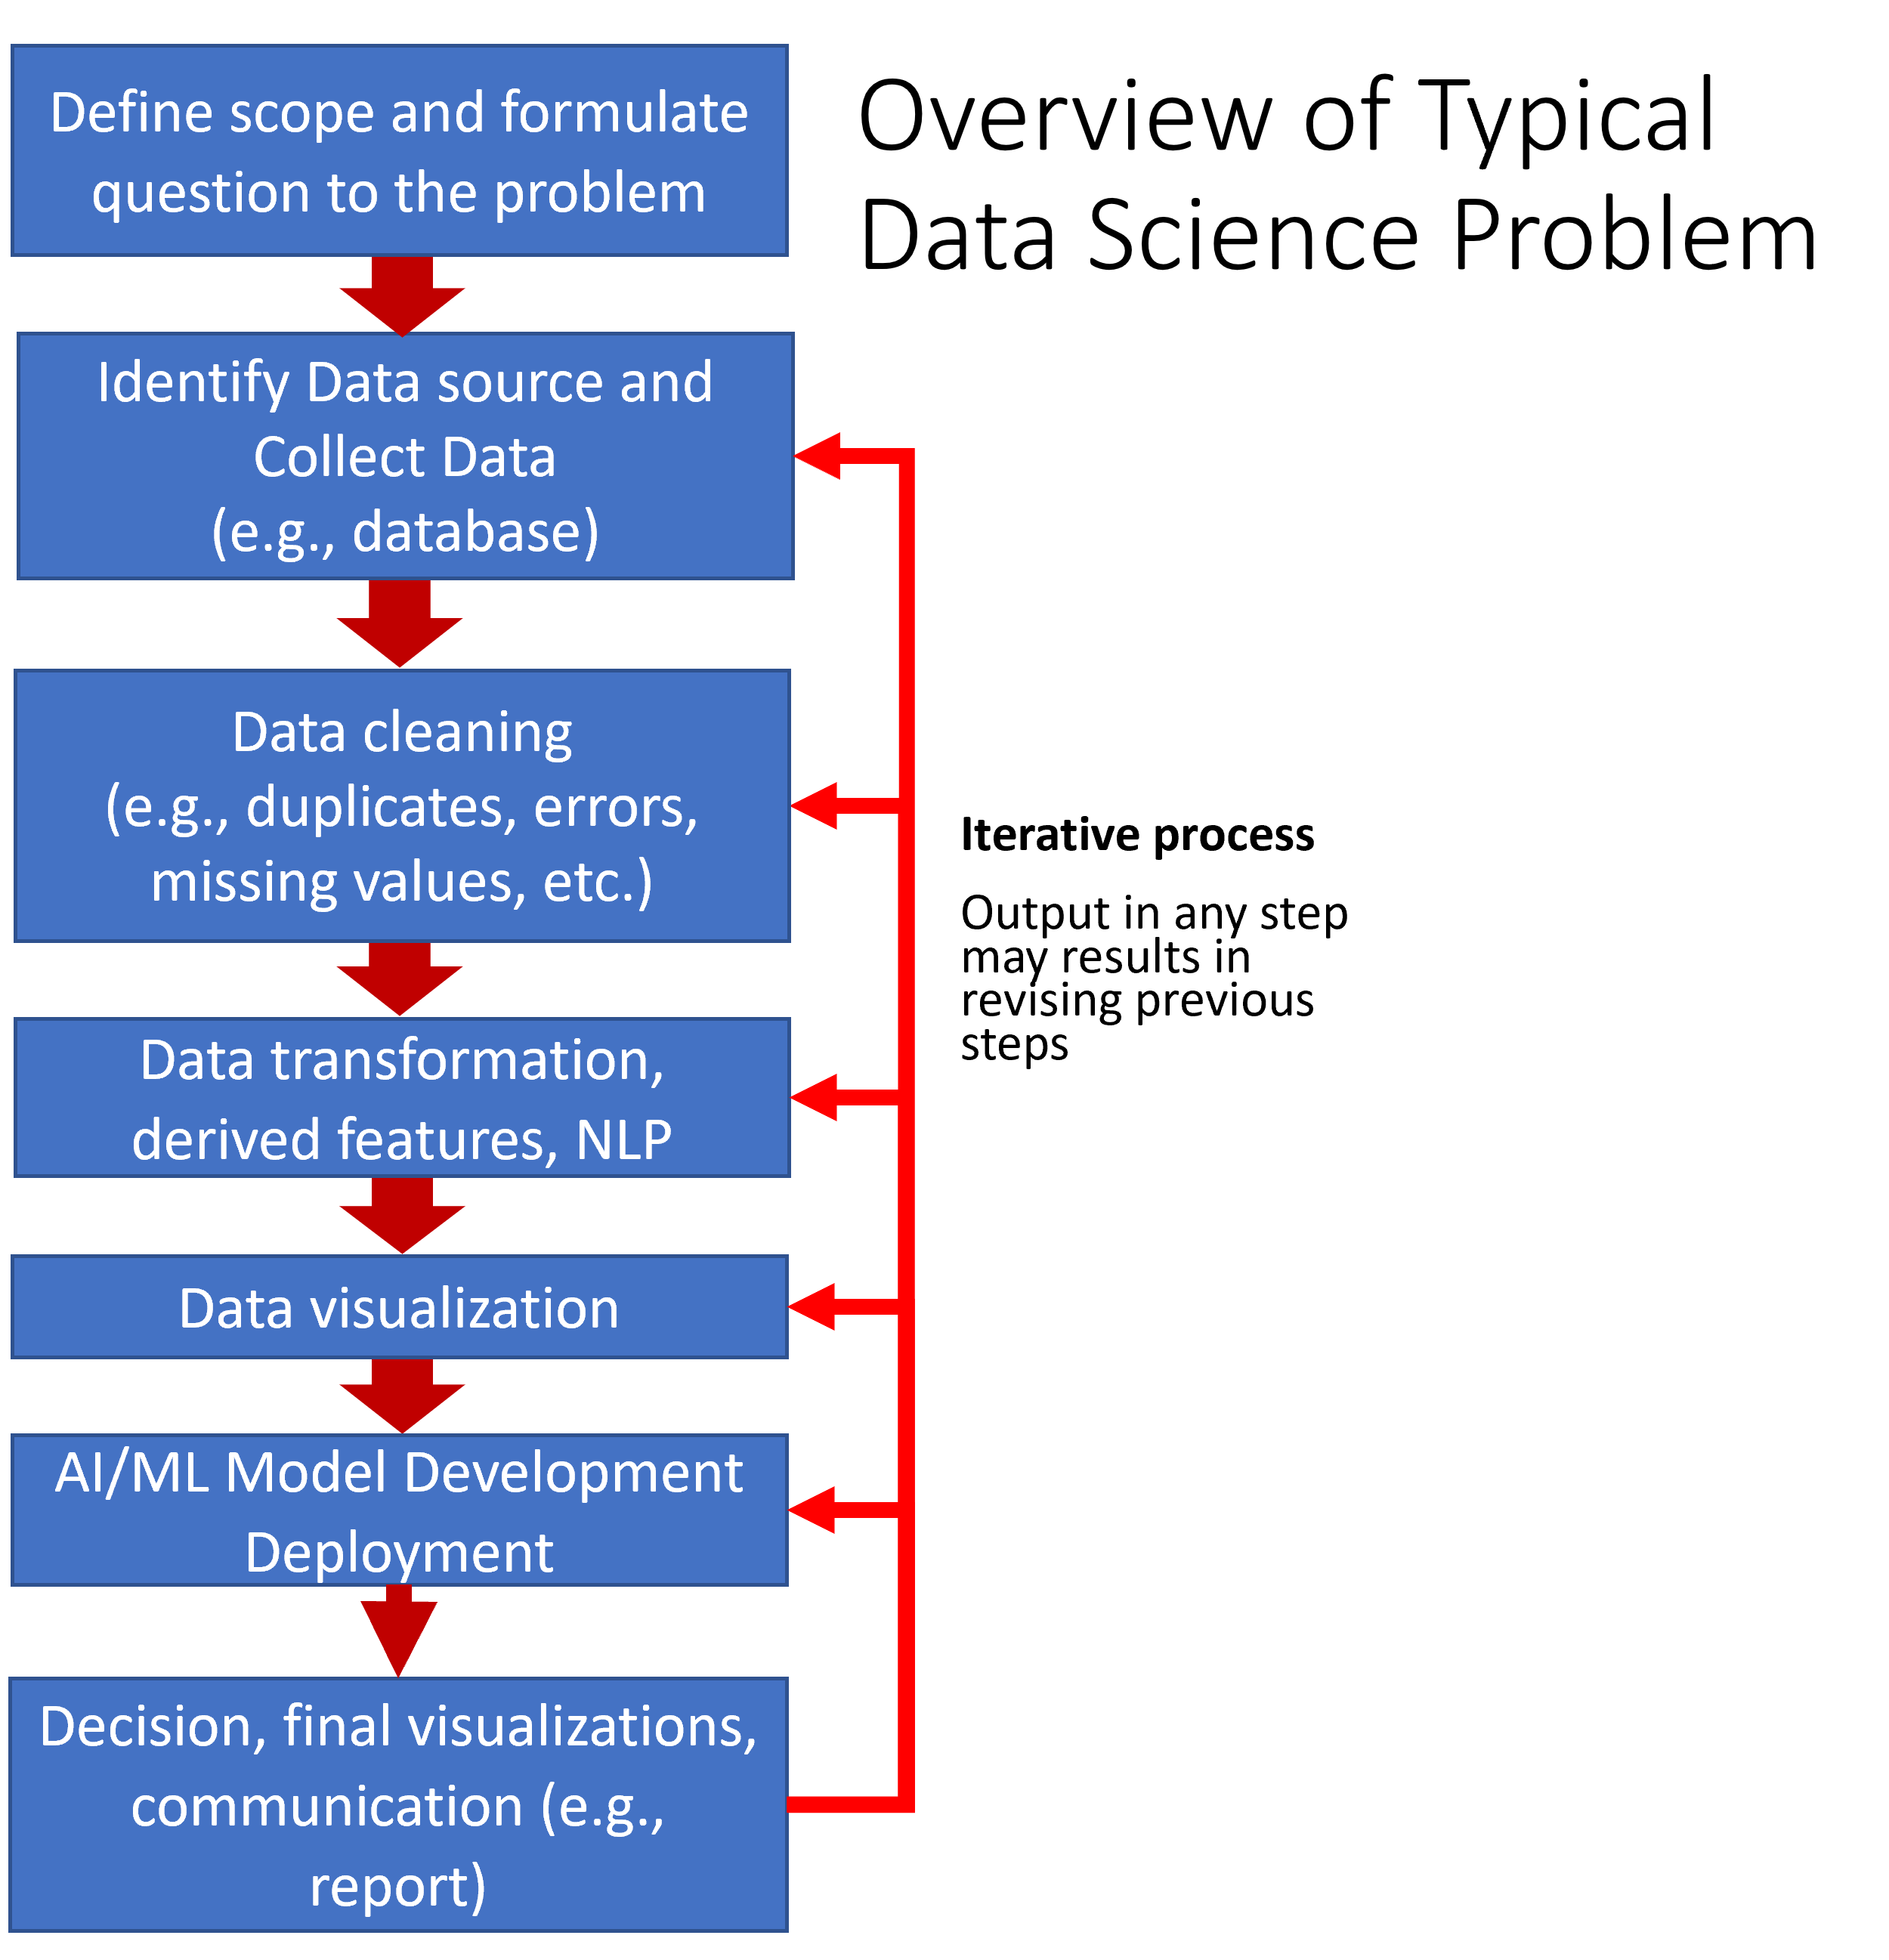

# Drop Columns
[Return to Table of Contents](#Table-of-Contents)

In this section we will explore if there is any columns that may be worth dropping.

In [10]:
# We can use the value_counts() to quickly explore the data of a column.
df_flights['year'].value_counts()
# We note that only one year is included in the Data. 
# Unless we are combining this data with data from another year we may not need the year column.
# We know all the data belongs to year 2013 and let's drop it.

year
2013    269866
Name: count, dtype: int64

In [11]:
print(df_flights.shape)
df_flights = df_flights.drop(columns=['year'])
print(df_flights.shape) # Verifying that the second element dropped from 19 to 18 features.

(269866, 19)
(269866, 18)


In [12]:
# Other columns that could be dropped are the flight numbers or tail_num.
# For now let's keep the rest of the columns.

# Convert Data Types
[Return to Table of Contents](#Table-of-Contents)

In this step we can convert the data of a column to a desired format. Previously we have noted that the time_hour could be converted to a datetime object.

In [13]:
# Let's check the dtype of the time_hour columns.
df_flights['time_hour'].dtype 

dtype('O')

In [14]:
df_flights['time_hour'].sample(5) # Let's get a few samples of data to see the format.

36413     2013-10-20T22:00:00Z
127775    2013-03-25T20:00:00Z
250014    2013-09-04T17:00:00Z
127610    2013-03-25T23:00:00Z
127068    2013-03-25T10:00:00Z
Name: time_hour, dtype: object

In [15]:
# Let's convert the time_hour column to datetime.
df_flights['time_hour'] = pd.to_datetime(df_flights['time_hour']) 

In [16]:
df_flights.info() # We can check again the .info() in the data.
# Confirm that runtime is now an integer data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269866 entries, 0 to 269865
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   month           269866 non-null  int64              
 1   day             269866 non-null  int64              
 2   dep_time        262269 non-null  float64            
 3   sched_dep_time  269866 non-null  int64              
 4   dep_delay       262269 non-null  float64            
 5   arr_time        261851 non-null  float64            
 6   sched_arr_time  269866 non-null  int64              
 7   arr_delay       261253 non-null  float64            
 8   carrier         269866 non-null  object             
 9   flight          269866 non-null  int64              
 10  tailnum         267384 non-null  object             
 11  origin          269866 non-null  object             
 12  dest            269866 non-null  object             
 13  air_time      

In [17]:
# Note the dtype of time_hour is a datetime.
print(df_flights['time_hour'].dtype) 
df_flights['time_hour'].sample(5) # Let's get a few samples of data to see the format.

datetime64[ns, UTC]


183142   2013-06-07 18:00:00+00:00
224053   2013-07-31 21:00:00+00:00
20097    2013-01-30 10:00:00+00:00
226101   2013-08-03 15:00:00+00:00
46261    2013-11-02 21:00:00+00:00
Name: time_hour, dtype: datetime64[ns, UTC]

# Duplicated Values: Statistics and Cleaning
[Return to Table of Contents](#Table-of-Contents)

Some datasets may have full duplicates (i.e., the full row repeated) or there may be unique values that are duplicated for some reason. The later may or may not be an issue.

In [18]:
# Creates dataframe of records that are full duplicates.
duplicates = df_flights[df_flights.duplicated(keep = False)].copy() 
print(f'There are {duplicates.shape[0]} records were all features are duplicate.')
duplicates.head(3) # Shows the duplicated rows if any.

There are 0 records were all features are duplicate.


Empty DataFrame
Columns: [month, day, dep_time, sched_dep_time, dep_delay, arr_time, sched_arr_time, arr_delay, carrier, flight, tailnum, origin, dest, air_time, distance, hour, minute, time_hour]
Index: []

In [19]:
df_flights.info()
# All columns are expected to have duplicated values as none of them are unique.
# For example, we expect that a flight with specific Tailnumber should be making various flights a day.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269866 entries, 0 to 269865
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   month           269866 non-null  int64              
 1   day             269866 non-null  int64              
 2   dep_time        262269 non-null  float64            
 3   sched_dep_time  269866 non-null  int64              
 4   dep_delay       262269 non-null  float64            
 5   arr_time        261851 non-null  float64            
 6   sched_arr_time  269866 non-null  int64              
 7   arr_delay       261253 non-null  float64            
 8   carrier         269866 non-null  object             
 9   flight          269866 non-null  int64              
 10  tailnum         267384 non-null  object             
 11  origin          269866 non-null  object             
 12  dest            269866 non-null  object             
 13  air_time      

In [20]:
# If we had full duplicated rows we could drop the rows as follows.
print(df_flights.shape)
df_flights = df_flights.drop_duplicates(keep = 'first').reset_index(drop=True)
print(df_flights.shape)
df_flights = df_flights.reset_index(drop=True)
# In this case no rows are dropped.

(269866, 18)
(269866, 18)


# Null Values: Statistics and Cleaning
[Return to Table of Contents](#Table-of-Contents)

Null values refers to empty values. Also, referred as NaN (i.e., not a number) in various libraries. Null values can be addressed in various ways from dropping the rows of Null values to using the mean of the group.

In [21]:
# Explores the total of null values in the dataframe.
# There may be columns we don't need and we may want to drop.
print(df_flights.shape)
df_flights.isnull().sum()
# We can see that the majority of the data has non-null values.
# We can also observe that both dep_time and dep_delay have both the same number of null values.
# The same applies for arr_delay and air_time.

# If we were analyzing departure time we would need to decide:
# 1) keep the null values and filter them out during analysis.
# 2) drop the rows with null departure times.
# 3) use the mean departure time for the column or maybe the airline could be another option.

(269866, 18)


month                0
day                  0
dep_time          7597
sched_dep_time       0
dep_delay         7597
arr_time          8015
sched_arr_time       0
arr_delay         8613
carrier              0
flight               0
tailnum           2482
origin               0
dest                 0
air_time          8613
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [22]:
# We can explore some of the data with null values.
print(f"The data has {df_flights[df_flights['dep_delay'].isnull()].shape[0]} null values.")
df_flights[df_flights['dep_delay'].isnull()].sample(5)

The data has 7597 null values.


month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
185630      6   10       NaN            1305        NaN       NaN   
172365      5   23       NaN            1520        NaN       NaN   
114338      3    7       NaN             610        NaN       NaN   
245474      8   28       NaN            1446        NaN       NaN   
84010      12   23       NaN            1500        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
185630            1455        NaN      MQ    4426  N722MQ    LGA  CMH   
172365            1639        NaN      EV    4141  N29906    EWR  MKE   
114338             726        NaN      EV    4354  N16541    EWR  IAD   
245474            1643        NaN      9E    3318     NaN    JFK  BUF   
84010             1611        NaN      US    2152     NaN    LGA  BOS   

        air_time  distance  hour  minute                 time_hour  
185630       NaN       479    13       5 2013-06-10 17:00:00+00:00  
172365       NaN       725    15      20 2013-05-23 19:00:00+00:00  
114338       NaN       212     6      10 2013-03-07 11:00:00+00:00  
245474       NaN       301    14      46 2013-08-28 18:00:00+00:00  
84010        NaN       184    15       0 2013-12-23 20:00:00+00:00

In [23]:
# We can explore rows that have arr_delay null and dep_time not null. some of the data with null values.
print(f"The overview data has {df_flights[(~df_flights['dep_time'].isnull()) & (df_flights['arr_delay'].isnull())].shape[0]} null values.")
df_flights[(~df_flights['dep_time'].isnull()) &
           (df_flights['arr_delay'].isnull())].sample(5)
# We can see that there are 1016 rows that have arr_delay null but dep_time notnull.

The overview data has 1016 null values.


month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
178939      6    2     655.0             655        0.0    1354.0   
204573      7    6    1035.0            1030        5.0       NaN   
125879      3   23     959.0             920       39.0    2129.0   
210089      7   13    1447.0            1441        6.0    2014.0   
57159      11   17    1113.0            1029       44.0       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
178939             935        NaN      AA    1815  N361AA    JFK  MCO   
204573            1350        NaN      VX      23  N848VA    JFK  SFO   
125879            1240        NaN      AA    1589  N4YMAA    EWR  DFW   
210089            1752        NaN      DL    1779  N362NW    LGA  FLL   
57159             1214        NaN      AA     325  N494AA    LGA  ORD   

        air_time  distance  hour  minute                 time_hour  
178939       NaN       944     6      55 2013-06-02 10:00:00+00:00  
204573       NaN      2586    10      30 2013-07-06 14:00:00+00:00  
125879       NaN      1372     9      20 2013-03-23 13:00:00+00:00  
210089       NaN      1076    14      41 2013-07-13 18:00:00+00:00  
57159        NaN       733    10      29 2013-11-17 15:00:00+00:00

In [24]:
# We can explore the same but with dep_time and dep_delay.
print(f"The overview data has {df_flights[(~df_flights['dep_time'].isnull()) & (df_flights['dep_delay'].isnull())].shape[0]} null values.")
df_flights[(df_flights['dep_time'].notnull()) &
           (df_flights['dep_delay'].isnull())].head(5)
# We can see that whenever dep_delay is null dep_time is also null.
# Think about what this could mean.

The overview data has 0 null values.


Empty DataFrame
Columns: [month, day, dep_time, sched_dep_time, dep_delay, arr_time, sched_arr_time, arr_delay, carrier, flight, tailnum, origin, dest, air_time, distance, hour, minute, time_hour]
Index: []

In [25]:
# Let's drop all rows that have a missing tailnumber.
print(df_flights.shape) # Initial shape of the data.
df_flights = df_flights[df_flights['tailnum'].notnull()] # We can reset index in this line or in the line below.
print(df_flights.shape) # Shape of the data after droping in previous line.

# We can also reset the index separately instead of in the line above.
df_flights = df_flights.reset_index(drop=True)

(269866, 18)
(267384, 18)


In [26]:
df_flights.isnull().sum() # Note that tailnum has 0 null values.

month                0
day                  0
dep_time          5115
sched_dep_time       0
dep_delay         5115
arr_time          5533
sched_arr_time       0
arr_delay         6131
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time          6131
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [27]:
# you can drop NA values along a different axis; axis=1 drops all columns containing a null value:
#flights.dropna(axis='columns')

#### Transforming Missing Values with Group Mean
If we wanted use the mean value we can fill the null values of a missing group as follows. Let's fill the missing air_time with the mean of the air_time based on the destination.

In [28]:
def my_filling_func(group):
    m = group.mean()
    if np.isnan(m):
        return -9999
    else:
        return group.fillna(m)

In [29]:
df_flights['air_time'].isnull().sum() # Note that air_time now has 0 null values. We used the mean.

6131

In [30]:
df_flights['air_time'].describe()

count    261253.000000
mean        150.716864
std          95.880359
min          20.000000
25%          81.000000
50%         124.000000
75%         193.000000
max         695.000000
Name: air_time, dtype: float64

In [31]:
print(df_flights.shape) # Initial shape of the data.
df_flights['air_time'] = df_flights.groupby('dest')['air_time'].transform(my_filling_func)
print(df_flights.shape) # Shape of the dataframe after filling the mean. Should be the same number of rows and columns.
df_flights.tail(3)

(267384, 18)
(267384, 18)


month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
267381      9   30       NaN            1210        NaN       NaN   
267382      9   30       NaN            1159        NaN       NaN   
267383      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
267381            1330        NaN      MQ    3461  N535MQ    LGA  BNA   
267382            1344        NaN      MQ    3572  N511MQ    LGA  CLE   
267383            1020        NaN      MQ    3531  N839MQ    LGA  RDU   

          air_time  distance  hour  minute                 time_hour  
267381  114.511328       764    12      10 2013-09-30 16:00:00+00:00  
267382   69.337278       419    11      59 2013-09-30 15:00:00+00:00  
267383   70.802177       431     8      40 2013-09-30 12:00:00+00:00

In [32]:
df_flights['air_time'].isnull().sum() # Note that air_time now has 0 null values. We used the mean.

0

In [33]:
df_flights['air_time'].describe()

count    267384.000000
mean        149.824402
std          95.469586
min          20.000000
25%          81.000000
50%         123.000000
75%         191.000000
max         695.000000
Name: air_time, dtype: float64

In [34]:
df_flights['dest'].value_counts()

dest
ATL    17154
ORD    16090
LAX    14437
CLT    13192
SFO    12236
       ...  
MTJ       14
SBN       10
ANC        8
SJC        1
LEX        1
Name: count, Length: 95, dtype: int64

# Numerical Features: Statistics and Cleaning
[Return to Table of Contents](#Table-of-Contents)

In further steps we may focus on numerical features. There are a few ways to explore the feature statistics in order to identify and decide which features to clean. We can use various functions including the .describe(), .hist() and sns.pairplot(). 

The pandas .hist() function allows exploring the distribution of the data very quickly. Histogram documentation at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

In [51]:
%%time
# The .hist() or histogram function shows the distribution for eadh of the numerical features.
# X-axis is the values in the feature and y-axis is how many or the counts.
df_flights.hist(figsize = [12, 12]);
# A few observations:
# We can see that months at the beginning of the year and end seem to have more flights.
# The days seem to be pretty constant. A few more flights at the end of the month.
# Delays are distributed to the left which makes sense.

CPU times: total: 250 ms
Wall time: 253 ms


The SNS pairplot allows to explore the scatter plots of all combination of two numerical features. SNS Pairplot documentation at: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [36]:
%%time
# The sns.pairplot() plots the relationship between any-two features. See documentation for other useful parameters.
# This can be used also for selecting which features may provide useful clusters or may be correlated.
# Note that if there are too many numberical features may be difficult to visualize. 
# Let's use a sample to first identify column pairs that we want to explore further.
sns.pairplot(df_flights.sample(n = 500));
# A few notes:
# Dep_time, sched_dep_time, dep_delay, arr_time, and arr_delay, distance, air_time

C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


CPU times: total: 14.4 s
Wall time: 15 s


C:\Users\felix\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


CPU times: total: 10 s
Wall time: 10.3 s


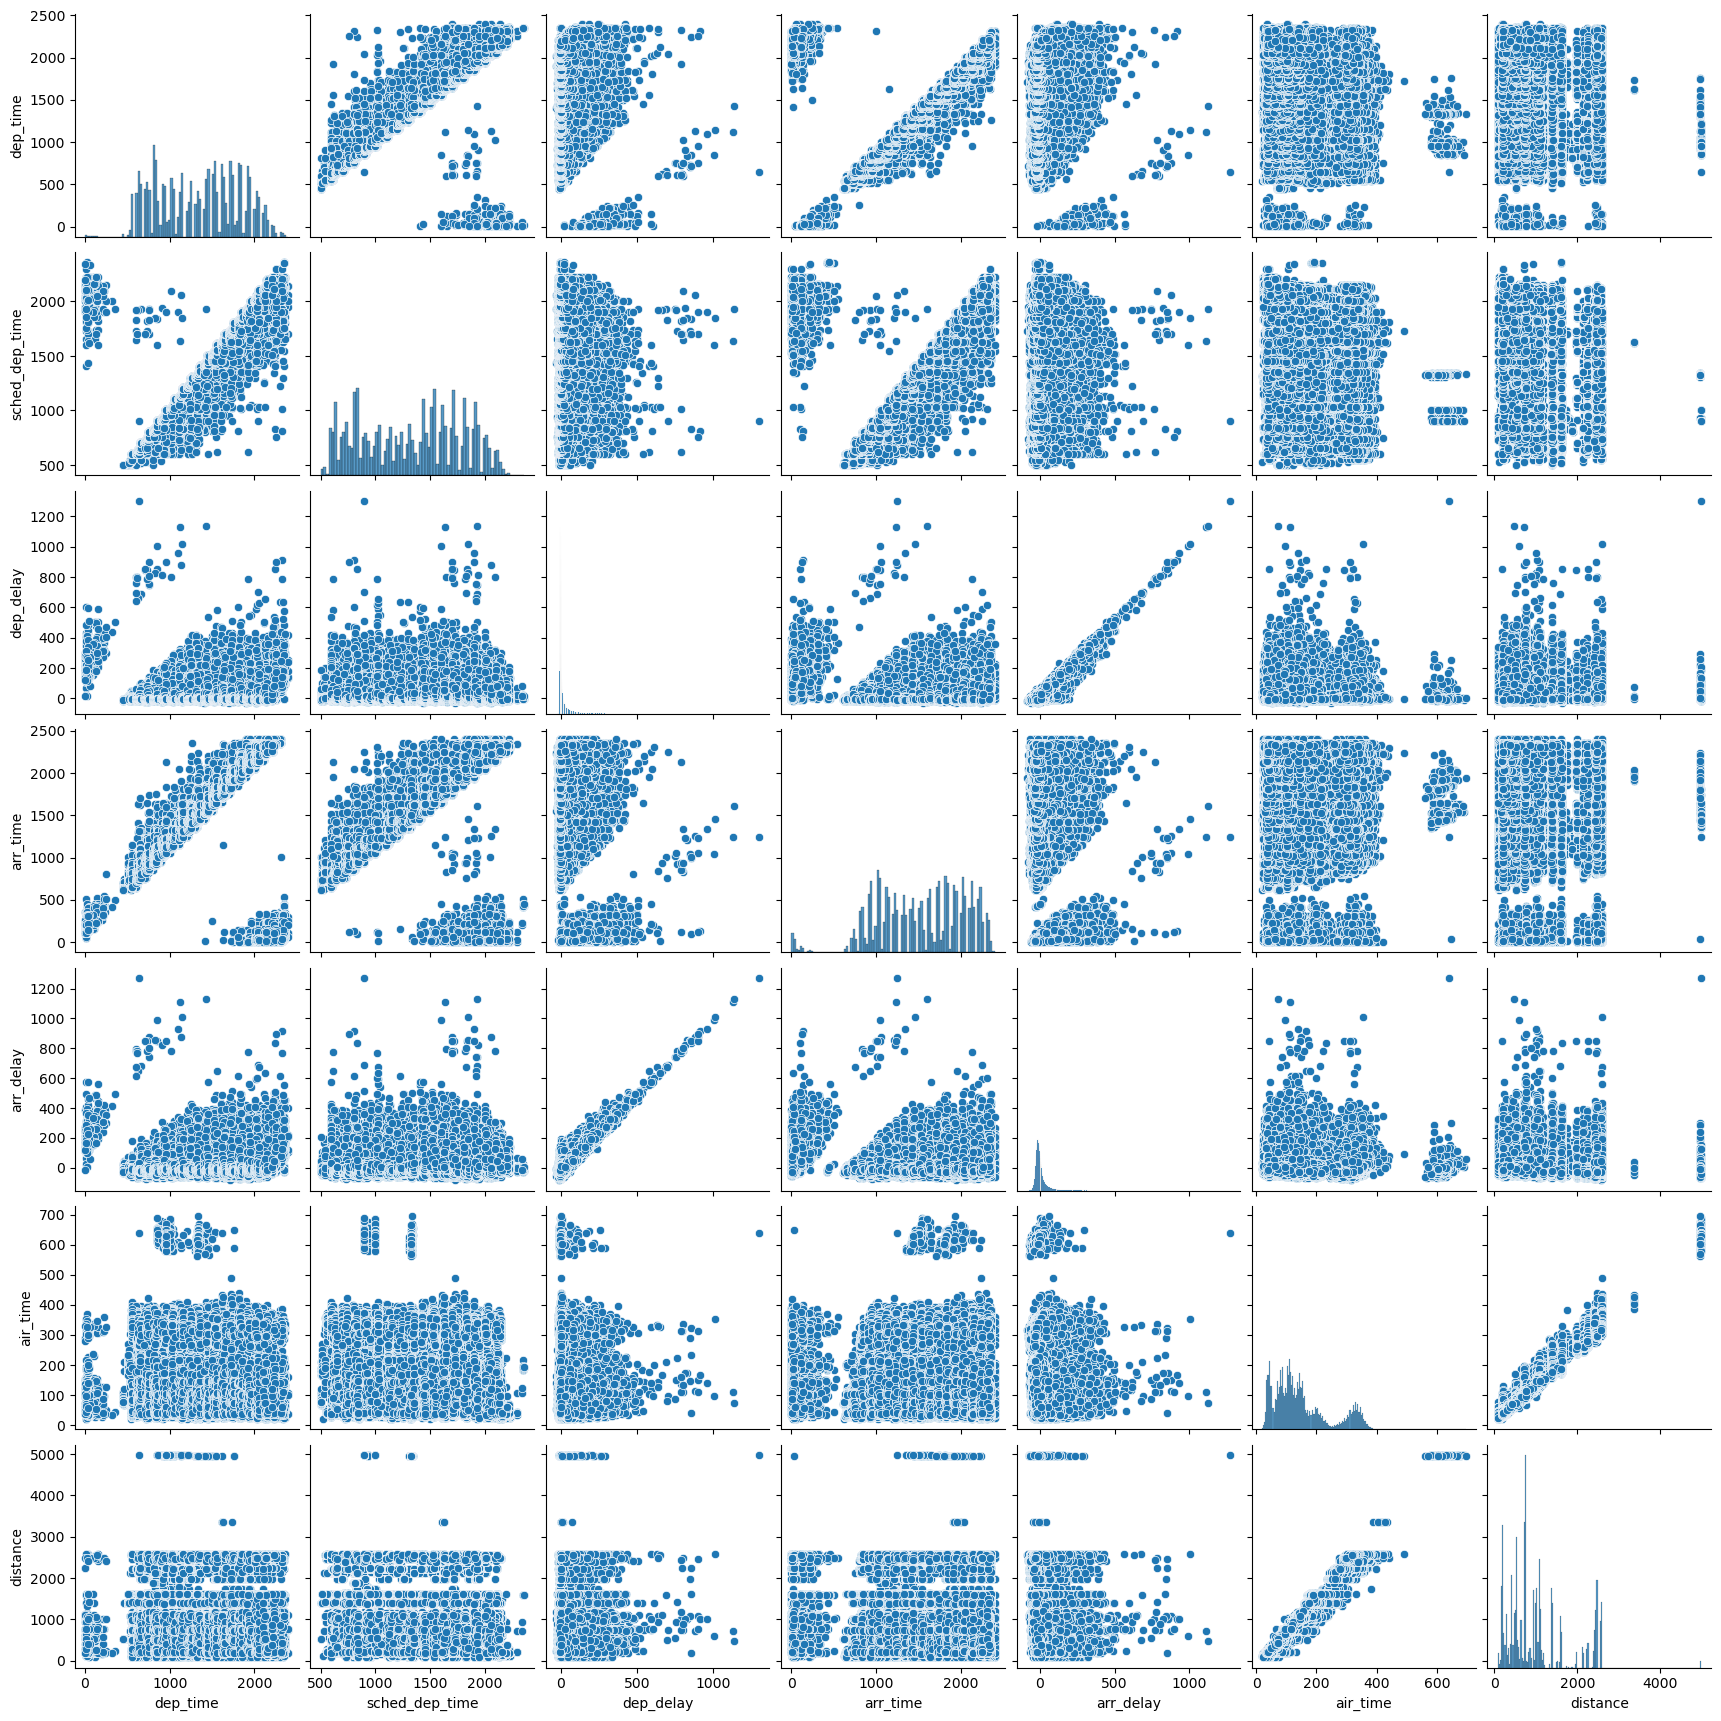

In [37]:
%%time
# Let's use the columns we identified above.
sns.pairplot(df_flights[['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'air_time', 'distance']]);
# Observations:
# dep_time and rest of the columsn seem to have about three clusters or more.
# sched_dep_time and distance seem to have a few outliers.
# dep_delay and arr_delay relationship seems to be linearly correlated. If departure will affect arrival.
# dep_delay and arr_time seem to have a dip in the data. Note sure what that may be.
# There seem to be some extreme outliers in some of the features.

In [38]:
df_flights.describe(percentiles = [0.5, 0.95]).T # Statistics only for numerical features.
# Observations:
# We could try to identify any columns that may have extreme values.
# For example, we can see that dep_delay the mean = 12.3, std = 40.4, 95% = 87 and the max = 1301. 
# In this case we can see that at least the max is an extreme outlier value.
# Similar behavior happens with the arr_delay.
# In other columns most max values are at least close to the max.

count         mean          std    min     50%     95%  \
month           267384.0     6.556918     3.411833    1.0     7.0    12.0   
day             267384.0    15.711183     8.761778    1.0    16.0    29.0   
dep_time        262269.0  1345.705467   473.840667    1.0  1407.0  2054.0   
sched_dep_time  267384.0  1336.002801   454.759101  500.0  1359.0  2025.0   
dep_delay       262269.0    12.326169    40.388480  -33.0    -2.0    87.0   
arr_time        261851.0  1524.674743   507.724006    1.0  1551.0  2242.0   
sched_arr_time  267384.0  1552.748799   471.572883    1.0  1606.0  2239.0   
arr_delay       261253.0     6.238267    44.865909  -86.0    -5.0    90.0   
flight          267384.0  2257.914498  1659.539807    1.0  1779.0  4990.0   
air_time        267384.0   149.824402    95.469586   20.0   123.0   341.0   
distance        267384.0  1039.144152   750.480435   80.0   762.0  2475.0   
hour            267384.0    13.104187     4.540869    5.0    13.0    20.0   
minute          267384.0    25.584078    19.362024    0.0    27.0    58.0   

                   max  
month             12.0  
day               31.0  
dep_time        2400.0  
sched_dep_time  2359.0  
dep_delay       1301.0  
arr_time        2400.0  
sched_arr_time  2359.0  
arr_delay       1272.0  
flight          8500.0  
air_time         695.0  
distance        4983.0  
hour              23.0  
minute            59.0

In [39]:
# Before filtering out values, we can also explore the other identified issue of very large differences using bins.
# Lets do a value_counts but creating a few bins to be able to evaluate the range of the runtime values.
# Note that including infinity in lower/upper bound may remove null values.
# Note that dep_delay still had null values.
# Use the statistics above to create significant bins.
df_flights['dep_delay'].value_counts(bins = [-np.inf, 0, 20, 80, 200, 300, 500, 1e3, np.inf], sort = False, dropna = False) 
# Note that there are two entries that have runtime values larger than 300.

dep_delay
(-inf, 0.0]        161840
(0.0, 20.0]         52264
(20.0, 80.0]        33426
(80.0, 200.0]       12471
(200.0, 300.0]       1763
(300.0, 500.0]        446
(500.0, 1000.0]        54
(1000.0, inf]           5
Name: count, dtype: int64

In [40]:
# We can individually evaluate entries with runtime larger than 300 filetering data as follows.
df_flights[df_flights['dep_delay'] > 1000]
# We can try to search the dep_delay to make sure it is correct.
# Or we can decide that these are outliers that are not needed for our tasks.
# SME expertise is very valuable in these steps to evaluate outliers and potential errors.
# Times seem to be in military time. 
# Should go back to the section where the data types is explored and converted and change times it to a time data type.

month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
5552        1    9     641.0             900     1301.0    1242.0   
6502        1   10    1121.0            1635     1126.0    1239.0   
187485      6   15    1432.0            1935     1137.0    1607.0   
214587      7   22     845.0            1600     1005.0    1044.0   
259522      9   20    1139.0            1845     1014.0    1457.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
5552              1530     1272.0      HA      51  N384HA    JFK  HNL   
6502              1810     1109.0      MQ    3695  N517MQ    EWR  ORD   
187485            2120     1127.0      MQ    3535  N504MQ    JFK  CMH   
214587            1815      989.0      MQ    3075  N665MQ    JFK  CVG   
259522            2210     1007.0      AA     177  N338AA    JFK  SFO   

        air_time  distance  hour  minute                 time_hour  
5552       640.0      4983     9       0 2013-01-09 14:00:00+00:00  
6502       111.0       719    16      35 2013-01-10 21:00:00+00:00  
187485      74.0       483    19      35 2013-06-15 23:00:00+00:00  
214587      96.0       589    16       0 2013-07-22 20:00:00+00:00  
259522     354.0      2586    18      45 2013-09-20 22:00:00+00:00

In [41]:
# Same as with the dep_delay we can create bins for the distance.
df_flights['arr_delay'].value_counts(bins = [-np.inf, 0, 20, 80, 200, 300, 500, 1e3, np.inf],
                                     sort = False, dropna = False)

arr_delay
(-inf, 0.0]        157162
(0.0, 20.0]         51963
(20.0, 80.0]        36839
(80.0, 200.0]       13054
(200.0, 300.0]       1727
(300.0, 500.0]        457
(500.0, 1000.0]        47
(1000.0, inf]           4
Name: count, dtype: int64

In [42]:
# Let's filter for the max for the distance which seemed to be an outlier.
df_flights[df_flights['distance'] == df_flights['distance'].max()]
# We can see that the max distance is due to the distance between JFK and HNL.

month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
123         1    1     857.0             900       -3.0    1516.0   
835         1    2     909.0             900        9.0    1525.0   
1579        1    3     914.0             900       14.0    1504.0   
2293        1    4     900.0             900        0.0    1516.0   
2968        1    5     858.0             900       -2.0    1519.0   
...       ...  ...       ...             ...        ...       ...   
263129      9   25    1001.0            1000        1.0    1508.0   
264735      9   27     951.0            1000       -9.0    1442.0   
265481      9   28     955.0            1000       -5.0    1412.0   
266021      9   29     957.0            1000       -3.0    1405.0   
266820      9   30     959.0            1000       -1.0    1438.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
123               1530      -14.0      HA      51  N380HA    JFK  HNL   
835               1530       -5.0      HA      51  N380HA    JFK  HNL   
1579              1530      -26.0      HA      51  N380HA    JFK  HNL   
2293              1530      -14.0      HA      51  N384HA    JFK  HNL   
2968              1530      -11.0      HA      51  N381HA    JFK  HNL   
...                ...        ...     ...     ...     ...    ...  ...   
263129            1445       23.0      HA      51  N389HA    JFK  HNL   
264735            1445       -3.0      HA      51  N390HA    JFK  HNL   
265481            1445      -33.0      HA      51  N391HA    JFK  HNL   
266021            1445      -40.0      HA      51  N384HA    JFK  HNL   
266820            1445       -7.0      HA      51  N392HA    JFK  HNL   

        air_time  distance  hour  minute                 time_hour  
123        659.0      4983     9       0 2013-01-01 14:00:00+00:00  
835        638.0      4983     9       0 2013-01-02 14:00:00+00:00  
1579       616.0      4983     9       0 2013-01-03 14:00:00+00:00  
2293       639.0      4983     9       0 2013-01-04 14:00:00+00:00  
2968       635.0      4983     9       0 2013-01-05 14:00:00+00:00  
...          ...       ...   ...     ...                       ...  
263129     636.0      4983    10       0 2013-09-25 14:00:00+00:00  
264735     629.0      4983    10       0 2013-09-27 14:00:00+00:00  
265481     584.0      4983    10       0 2013-09-28 14:00:00+00:00  
266021     580.0      4983    10       0 2013-09-29 14:00:00+00:00  
266820     603.0      4983    10       0 2013-09-30 14:00:00+00:00  

[342 rows x 18 columns]

In [43]:
# Lets use a data filtering approach to filter out the values that were determined to be dropped.
print(df_flights.shape)
df_flights = df_flights.loc[(df_flights['dep_delay'] < 1000) &
                            (df_flights['arr_delay'] < 1000)].reset_index(drop=True)
print(df_flights.shape)
# This will drop the dataframe from 267,384 entries to 261,248.

(267384, 18)
(261248, 18)


# Categorical Features (i.e., Non-numerical)
[Return to Table of Contents](#Table-of-Contents)

This dataset has non-numerical categorical features in the carriers. Let's explore the carriers data.

#### One-Hot-Encoding
In some cases it may be beneficial to convert a categorical data feature to one-hot-encoding format. Typically, a feature that has categorical values (e.g., genres, original language) can be converted to one-hot-encoding. The following sections explores cleaning of non-numerical categorical feataures and where appropriate convert to one-hot-encoding. The decision on which column to convert to one-hot-encoding comes with experience. One of the main reasons to convert to one-hot-encoding format is in preparation for features that will be used as part of post data cleaning analyses (e.g., classification tasks). Recall the dummy data trap (discussed at 16_Pandas_Data_Analysis_and_Transformation.ipynb) when using one-hot-encoding or dummy data.

In this case it may not make sense to convert carrier data to one-hot-encoding.

#### Imbalanced Datasets
Imbalanced datasets refers to the cases where a categorical value may not be represented equally to other categorical values. Typically this is a problem in supervised machine learning classification algorithms training data. In those cases were data is imbalanced there are a few methods that could be applied. This include:
1. Sampling: Down sample those that are well represented and up sampling the ones that are not well represented.
2. Enhance or augment the data
3. Use synthetic data
This will be discussed in more detail in later lectures.

In [44]:
df_flights['carrier'].value_counts(normalize = False, sort = True, ascending = False, dropna = False)
# The value_counts provide a count of unique values accross the dataframe.
# In this case how many flights each carrier has in the data.
# Note that there are a few carriers that don't have a lot of flights.
# This could represent a data balance.
# Depending on what we want to do, we may want to filter some of these carriers out.

carrier
UA    57782
EV    51108
DL    47658
AA    31946
MQ    25034
US    19831
9E    17294
VX     5116
FL     3175
AS      709
F9      681
YV      544
HA      341
OO       29
Name: count, dtype: int64

In [45]:
# Let's filter carriers that have less than 1000 counts.
# We can filter carriers individually as follow:
print(df_flights.shape)
df_flights = df_flights[df_flights.carrier != 'OO'] # Dropping rows with OO carrier.
print(df_flights.shape)

# Remember when droping rows to reset index.
df_flights = df_flights.reset_index(drop=True)

(261248, 18)
(261219, 18)


In [46]:
# A more efficient approach woudl be to filter by the number of value counts.
print(df_flights.shape)
df_flights = df_flights.groupby('carrier').filter(lambda x : len(x) >= 1000).reset_index(drop = True)
print(df_flights.shape)
df_flights.sample(5)

(261219, 18)
(258944, 18)


month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
143545      4   23    1643.0            1545       58.0    1734.0   
176262      6    7    1906.0            1859        7.0    2033.0   
21948      10    2    1300.0            1300        0.0    1548.0   
26424      10    8    1510.0            1435       35.0    1648.0   
178715      6   11    1053.0            1059       -6.0    1405.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
143545            1712       22.0      9E    3580  N8432A    JFK  BWI   
176262            2036       -3.0      UA     693  N412UA    LGA  ORD   
21948             1600      -12.0      VX     411  N623VA    JFK  LAX   
26424             1609       39.0      UA     460  N802UA    EWR  CLE   
178715            1418      -13.0      UA    1574  N24202    EWR  SFO   

        air_time  distance  hour  minute                 time_hour  
143545      35.0       184    15      45 2013-04-23 19:00:00+00:00  
176262     111.0       733    18      59 2013-06-07 22:00:00+00:00  
21948      325.0      2475    13       0 2013-10-02 17:00:00+00:00  
26424       64.0       404    14      35 2013-10-08 18:00:00+00:00  
178715     347.0      2565    10      59 2013-06-11 14:00:00+00:00

# Derived Features
[Return to Table of Contents](#Table-of-Contents)

Derived features refer to data in a new column that originates from values in existing columns. There are various methods to created derived features. Previously we had defined the new feature based on existing features. In this section we use the transform function. Apply is another function that could be used to create new derived features.

Documentation References:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [47]:
def relative_contribution_to_total_delay(group):
    return group/group.sum()

In [48]:
# Groups by 'origin', 'dest', 'month', 'day' and calculates the departure delay group/group.sum()
df_flights['dep_delay_relative_transform'] = df_flights.groupby(['origin', 
                                                                 'dest', 
                                                                 'month', 
                                                                 'day'])['dep_delay'].transform(relative_contribution_to_total_delay) 
df_flights.head(10)

month  day  dep_time  sched_dep_time  dep_delay  arr_time  sched_arr_time  \
0      1    1     517.0             515        2.0     830.0             819   
1      1    1     533.0             529        4.0     850.0             830   
2      1    1     542.0             540        2.0     923.0             850   
3      1    1     554.0             600       -6.0     812.0             837   
4      1    1     554.0             558       -4.0     740.0             728   
5      1    1     557.0             600       -3.0     709.0             723   
6      1    1     558.0             600       -2.0     753.0             745   
7      1    1     558.0             600       -2.0     924.0             917   
8      1    1     558.0             600       -2.0     923.0             937   
9      1    1     559.0             600       -1.0     941.0             910   

   arr_delay carrier  flight tailnum origin dest  air_time  distance  hour  \
0       11.0      UA    1545  N14228    EWR  IAH     227.0      1400     5   
1       20.0      UA    1714  N24211    LGA  IAH     227.0      1416     5   
2       33.0      AA    1141  N619AA    JFK  MIA     160.0      1089     5   
3      -25.0      DL     461  N668DN    LGA  ATL     116.0       762     6   
4       12.0      UA    1696  N39463    EWR  ORD     150.0       719     5   
5      -14.0      EV    5708  N829AS    LGA  IAD      53.0       229     6   
6        8.0      AA     301  N3ALAA    LGA  ORD     138.0       733     6   
7        7.0      UA     194  N29129    JFK  LAX     345.0      2475     6   
8      -14.0      UA    1124  N53441    EWR  SFO     361.0      2565     6   
9       31.0      AA     707  N3DUAA    LGA  DFW     257.0      1389     6   

   minute                 time_hour  dep_delay_relative_transform  
0      15 2013-01-01 10:00:00+00:00                      0.068966  
1      29 2013-01-01 10:00:00+00:00                      0.028777  
2      40 2013-01-01 10:00:00+00:00                      0.020833  
3       0 2013-01-01 11:00:00+00:00                      0.125000  
4      58 2013-01-01 10:00:00+00:00                     -0.027972  
5       0 2013-01-01 11:00:00+00:00                      0.230769  
6       0 2013-01-01 11:00:00+00:00                      0.500000  
7       0 2013-01-01 11:00:00+00:00                     -0.013423  
8       0 2013-01-01 11:00:00+00:00                     -0.033898  
9       0 2013-01-01 11:00:00+00:00                     -0.009346

# Export Final DataFrame
[Return to Table of Contents](#Table-of-Contents)

Exporting the final cleaned dataframe which can then be used as input into the other notebooks or shared with other stakeholders.

In [49]:
# Before exporting lets drop a few of the columns like Flight, Tailnum and dep_delay_relative_transform
# This is to limit the filesize to less than 25MB.
df_flights = df_flights.drop(columns=['flight', 'tailnum', 'dep_delay_relative_transform'])

In [50]:
# TO EXPORT AS CSV
df_flights.to_csv(r'.\output_data\nyc_flights_small_cleaned.csv', encoding='utf-8-sig', index = False, header=True)

# Extra/Bonus:

Practice Questions:
1. Filter for flights that had an arrival delay of two or more hours.
2. How many flights flew to Houston (IAH or HOU)?
3. Were operated by American, and Delta?
4. How many values are missing in `dep_time`?
5. Sort `flight` to find fastest flight.
6. Which flights travelled the shortest?
7. When do the first and last flights leave each day?
8. When there is a missing value in `dep_time` then this is an indication of canceled flight. Find the number of cancelled flights for each (`carrier`, `origin`) combination.
9. Which carrier has the worst `dep_delay`s? 
10. Which plane (`tailnum`) has the worst on-time record?
11. For each plane, count the number of flights before the first delay of greater than 1 hour.

# NOTEBOOK END